# Recreating de Boer (2000)

In the previous notebook, `1_implementing_de_boer_2000.ipynb`, we implemented the classes needed to run the experimetns performed by de Boer(2000).
We extracted these classes to the `imitationGameClasses.py` file.
We will now use these classes to recreate the games results from by de Boer (2000).

**Reference**: de Boer, B. (2000). Self-organization in vowel systems. *In Journal of Phonetics (Vol. 28, Issue 4, pp. 441–465)*. Elsevier BV. https://doi.org/10.1006/jpho.2000.0125

<hr>
<hr>

## Table of contents

- Student information
- Required imports
- Emergence of a vowel system
   - Parameters inferred from the paper
   - Optimized parameters for thighter cluster result
   - Optimized parameters for more clusters
- Evaluation of the emerged vowel system
- Sensitivity to parameter changes
   - Acoustic noise impact
   - Effective second formant weight impact
   - Population size impact

<hr>
<hr>

## Student information

- **Name**: Bontinck Lennert
- **Student ID**: 568702
- **Affiliation**: VUB - Master Computer Science: AI

<hr>
<hr>

## Required imports

Below we import the required things for this notebook.

In [1]:
# Import imitation game classes made in the previous notebook
from imitationGameClasses import Synthesizer, BarkOperator, GameEngine, Statistics;

# Used for saving and loading variables
import pickle;

# Used for easier list operations
import numpy as np;

<hr>
<hr>

## Emergence of a vowel system

Below we will recreate de Boer's (2000) first experiment.
The results from this experiment are depicted in figure 4 of the report.

### Parameters inferred from the paper

We will start of by performing an expirement using the parameters that were inferred after reading the paper.

In [2]:
if False: # Use saved result per default
    # Use provided variables to configure game
    number_of_agents = 20;
    iterations = 10000;

    agent_phoneme_step_size = 0.1;
    agent_sound_threshold_game = 0.5;
    agent_sound_threshold_self = 0.7;
    agent_sound_minimum_tries = 5;
    agent_new_sound_probability = 0.01;

    max_noise_ambient = 0.1;

    critical_distance = 3.5;
    second_formant_weight = 0.3;


    synthesizer = Synthesizer(max_noise_ambient = max_noise_ambient);
    bark_operator = BarkOperator(critical_distance = critical_distance, second_formant_weight = second_formant_weight);
    game_engine = GameEngine(number_of_agents= number_of_agents, iterations= iterations,
                                synthesizer= synthesizer, bark_operator= bark_operator, 
                                agent_phoneme_step_size= agent_phoneme_step_size,
                                agent_sound_threshold_game= agent_sound_threshold_game,
                                agent_sound_threshold_self= agent_sound_threshold_self,
                                agent_sound_minimum_tries= agent_sound_minimum_tries,
                                agent_new_sound_probability= agent_new_sound_probability);

    # Play the game the game engine was configured for
    checkpoints = [20, 500, 2000, 10000];
    game_states = game_engine.play_imitation_game(checkpoints);

    # Store result to file
    with open("saved_variables/2/2-de_boer_parameters.pickle", 'wb') as f:
        pickle.dump(game_states, f);


    # Delete unused variables
    del number_of_agents;
    del iterations;
    del agent_phoneme_step_size;
    del agent_sound_threshold_game;
    del agent_sound_threshold_self;
    del agent_sound_minimum_tries;
    del agent_new_sound_probability;
    del max_noise_ambient;
    del critical_distance;
    del second_formant_weight;
    del synthesizer;
    del bark_operator;
    del game_engine;
    del checkpoints;
    del game_states;
    del f;

In [3]:
# Get saved experiment result from file
with open("saved_variables/2/2-de_boer_parameters.pickle", 'rb') as f:
    game_states = pickle.load(f);

# Delete unused variables
del f;

#### Plotting the results

Having played the games using the parameters we inferred from the paper we can plot the results.

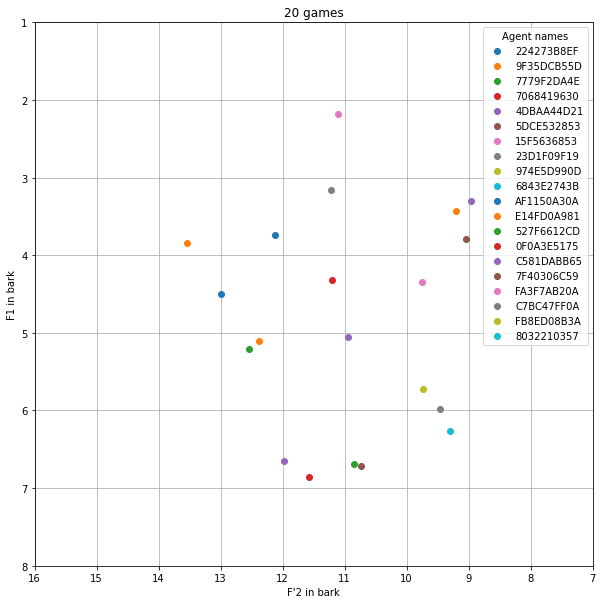

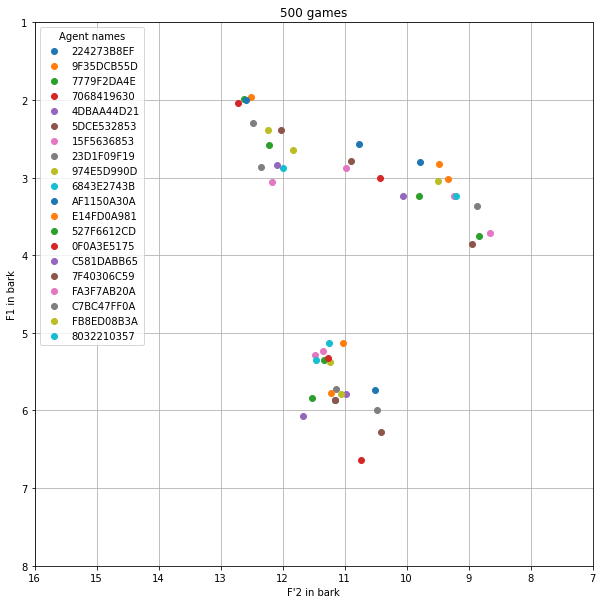

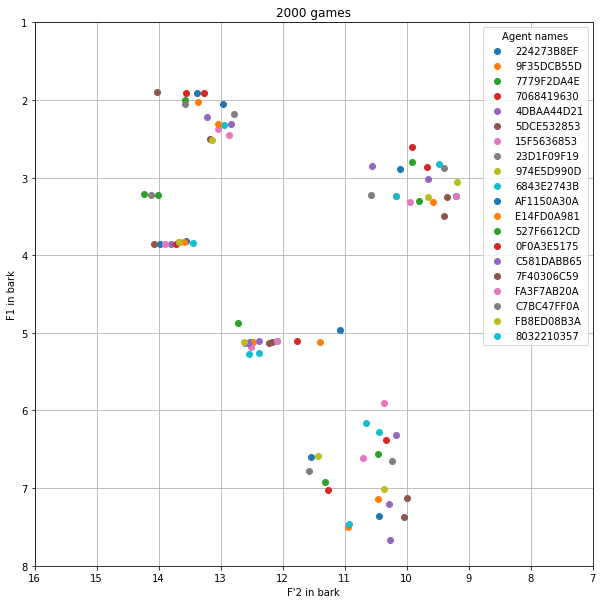

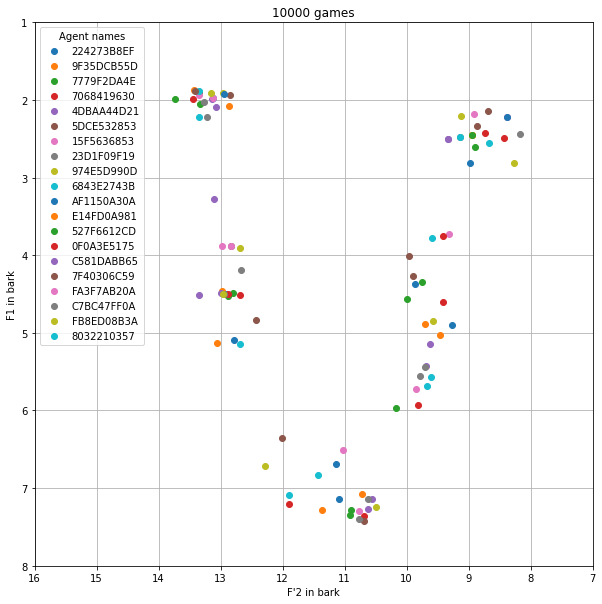

In [4]:
for game_state in game_states:
    game_state.plot();

# Delete unused variables
del game_state

#### Discussing the results

We can see that the clue of the plots is the same as disccuse in the paper.
Namely, in the first 20 games not that many sounds exist and they are randomly distributed.
In the 500th game a clustering has started to appear but there still aren't that many vowels, different clusters.
Going furhter more sounds are introduced, which makes it take longer for the clusters to occur.
In the end we have multiple clusters, often around 5.

After repeating the experiment a couple of times we find it to be not that stable, the amount of clusters can differ strongly and sometimes the emergence is lost in the final plot.
The clusters also seem larger then the ones from the paper.
We will try to alter the parameters to more closely represent the resulst shown in the paper.

This concludes the expirement, we will now remove the results obtained.

In [5]:
# Delete unused variables
del game_states

<hr>

### Optimized parameters for thighter cluster result

We will perform the same experiment as before with slightly altered parameters to make the results more comparable to those in the paper and more stable.
We think the fact that the clusters are larger then they appear in the paper is due to the phenome step size of 0.1.
Since the vowels start from a random state, it can be that the highest precision due to improvement still differs 0.5 for each parmeter of the phenome.
We thus shrink this step size.
We opt for this compared to making the random start rounded as the random start can be compared to the difference in human-to-human vocal accents etc.

In [6]:
if False: # Use previous results per default
    # Use provided variables to configure game
    number_of_agents = 20;
    iterations = 10000;

    agent_phoneme_step_size = 0.025; # Modified from 0.1
    agent_sound_threshold_game = 0.5;
    agent_sound_threshold_self = 0.7;
    agent_sound_minimum_tries = 5;
    agent_new_sound_probability = 0.01;

    max_noise_ambient = 0.1;

    critical_distance = 3.5;
    second_formant_weight = 0.3;


    synthesizer = Synthesizer(max_noise_ambient = max_noise_ambient);
    bark_operator = BarkOperator(critical_distance = critical_distance, second_formant_weight = second_formant_weight);
    game_engine = GameEngine(number_of_agents= number_of_agents, iterations= iterations,
                                synthesizer= synthesizer, bark_operator= bark_operator, 
                                agent_phoneme_step_size= agent_phoneme_step_size,
                                agent_sound_threshold_game= agent_sound_threshold_game,
                                agent_sound_threshold_self= agent_sound_threshold_self,
                                agent_sound_minimum_tries= agent_sound_minimum_tries,
                                agent_new_sound_probability= agent_new_sound_probability);

    # Play the game the game engine was configured for
    checkpoints = [20, 500, 2000, 10000];
    game_states = game_engine.play_imitation_game(checkpoints);

    # Store result to file
    with open("saved_variables/2/2-thighter_clusters.pickle", 'wb') as f:
        pickle.dump(game_states, f);


    # Delete unused variables
    del number_of_agents;
    del iterations;
    del agent_phoneme_step_size;
    del agent_sound_threshold_game;
    del agent_sound_threshold_self;
    del agent_sound_minimum_tries;
    del agent_new_sound_probability;
    del max_noise_ambient;
    del critical_distance;
    del second_formant_weight;
    del synthesizer;
    del bark_operator;
    del game_engine;
    del checkpoints;
    del game_states;
    del f;

In [7]:
# Get saved experiment result from file
with open("saved_variables/2/2-thighter_clusters.pickle", 'rb') as f:
    game_states = pickle.load(f);

# Delete unused variables
del f;

#### Plotting the results

Having played the games using the parameters we inferred from the paper we can plot the results.

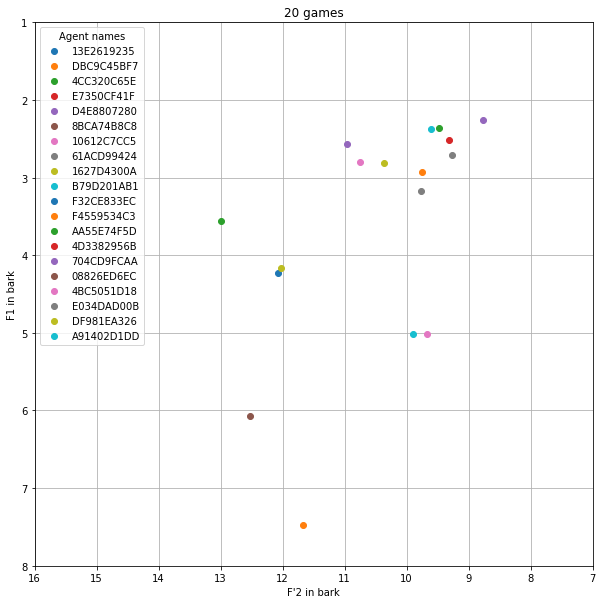

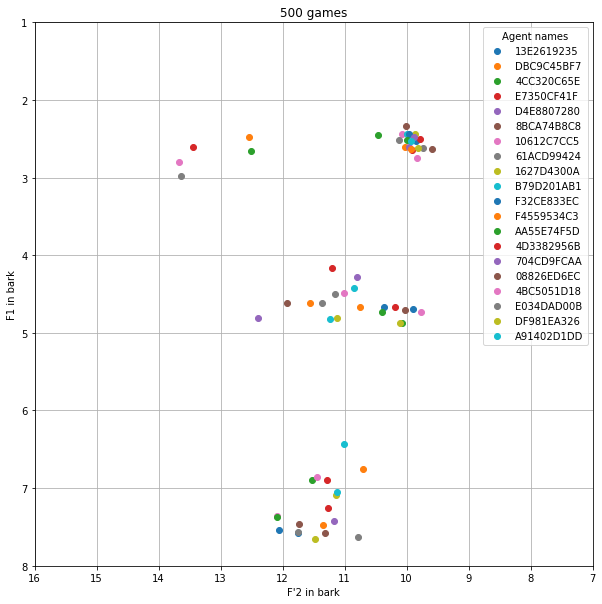

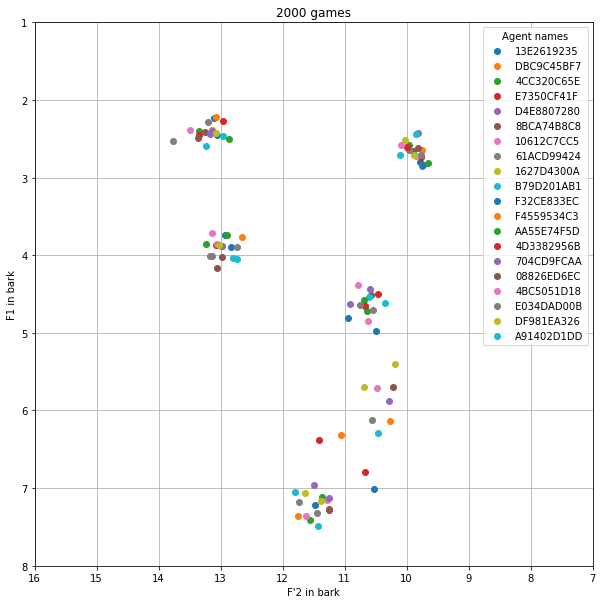

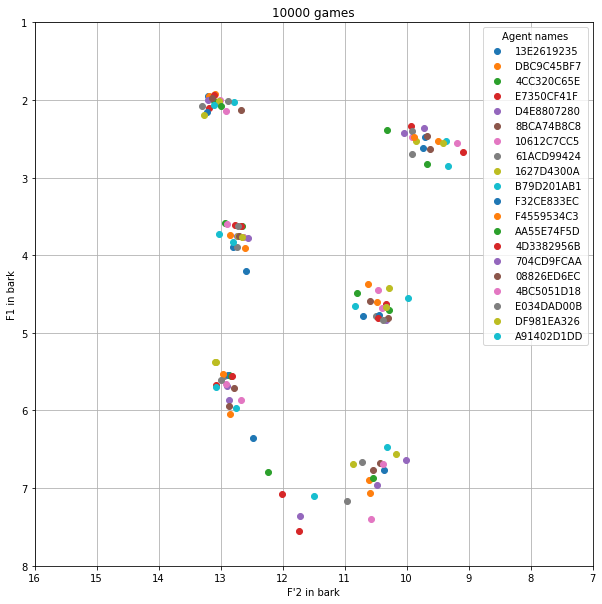

In [8]:
for game_state in game_states:
    game_state.plot();

# Delete unused variables
del game_state

#### Discussing the results

We can see that the clusters are now indeed thighter and thus that our assumption of the parameter change was correct.
The experiment results are also more stable now.

This concludes the expirement, we will now remove the results obtained.

In [9]:
# Delete unused variables
del game_states

<hr>

### Optimized parameters for more clusters

Another aspect that is noticed is the fact that our amount of clusters is slightly less overal compared to those by de Boer (2000).
We think this is due to new vowels being punished too fast and being improved too slow.
We extend the boundry for the amount of times a vowel has to be tried before removal and make the boundry for optimisation after a imitation game failure higher.

In [10]:
if False: # Use previous result per default
    # Use provided variables to configure game
    number_of_agents = 20;
    iterations = 10000;

    agent_phoneme_step_size = 0.025; # Modified from 0.1
    agent_sound_threshold_game = 0.6; # Modified from 0.5
    agent_sound_threshold_self = 0.7;
    agent_sound_minimum_tries = 20; # Modified from 5
    agent_new_sound_probability = 0.01;

    max_noise_ambient = 0.1;

    critical_distance = 3.5;
    second_formant_weight = 0.3;


    synthesizer = Synthesizer(max_noise_ambient = max_noise_ambient);
    bark_operator = BarkOperator(critical_distance = critical_distance, second_formant_weight = second_formant_weight);
    game_engine = GameEngine(number_of_agents= number_of_agents, iterations= iterations,
                                synthesizer= synthesizer, bark_operator= bark_operator, 
                                agent_phoneme_step_size= agent_phoneme_step_size,
                                agent_sound_threshold_game= agent_sound_threshold_game,
                                agent_sound_threshold_self= agent_sound_threshold_self,
                                agent_sound_minimum_tries= agent_sound_minimum_tries,
                                agent_new_sound_probability= agent_new_sound_probability);

    # Play the game the game engine was configured for
    checkpoints = [20, 500, 2000, 10000];
    game_states = game_engine.play_imitation_game(checkpoints);

    # Store result to file
    with open("saved_variables/2/2-more_clusters.pickle", 'wb') as f:
        pickle.dump(game_states, f);


    # Delete unused variables
    del number_of_agents;
    del iterations;
    del agent_phoneme_step_size;
    del agent_sound_threshold_game;
    del agent_sound_threshold_self;
    del agent_sound_minimum_tries;
    del agent_new_sound_probability;
    del max_noise_ambient;
    del critical_distance;
    del second_formant_weight;
    del synthesizer;
    del bark_operator;
    del game_engine;
    del checkpoints;
    del game_states;
    del f;

In [11]:
# Get saved experiment result from file
with open("saved_variables/2/2-more_clusters.pickle", 'rb') as f:
    game_states = pickle.load(f);

# Delete unused variables
del f;

#### Plotting the results

Having played the games using the parameters we inferred from the paper we can plot the results.

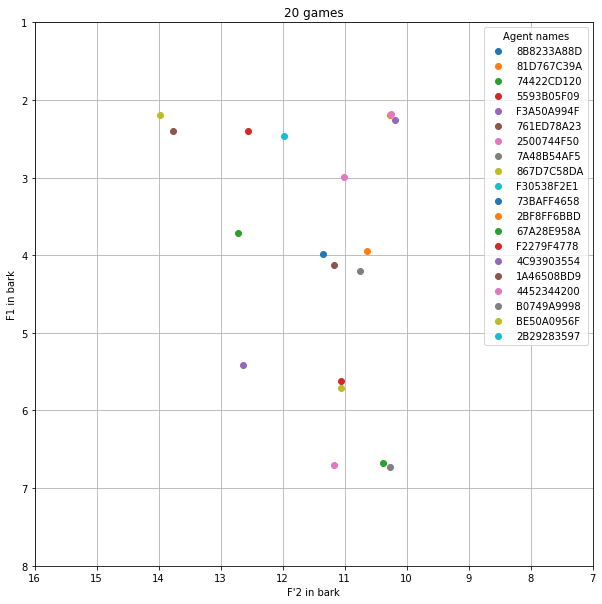

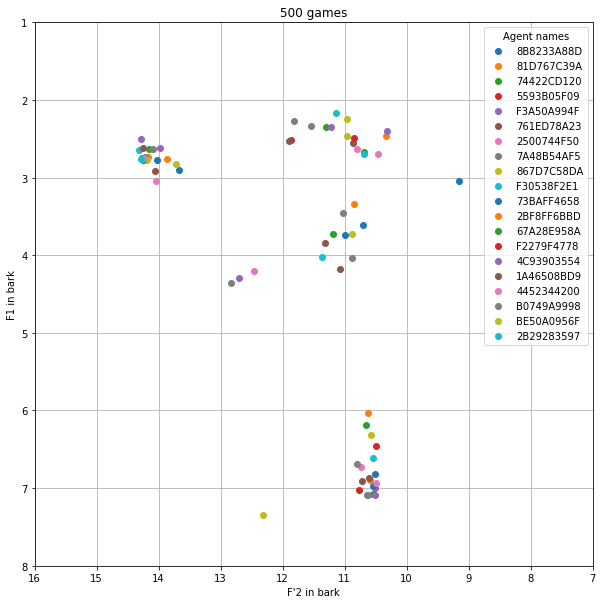

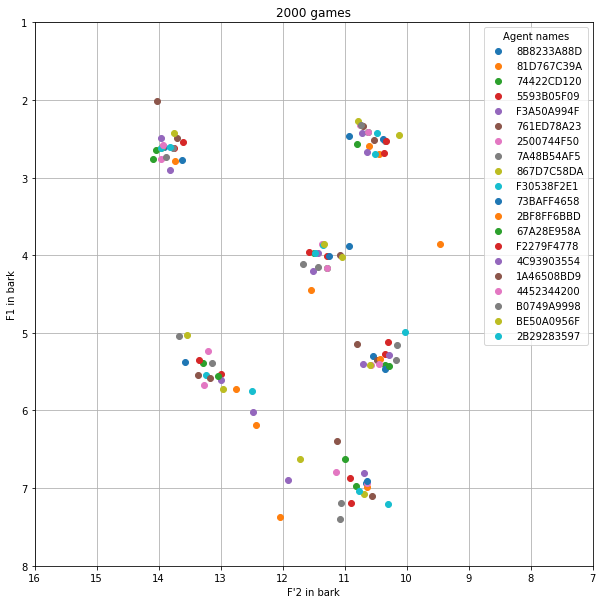

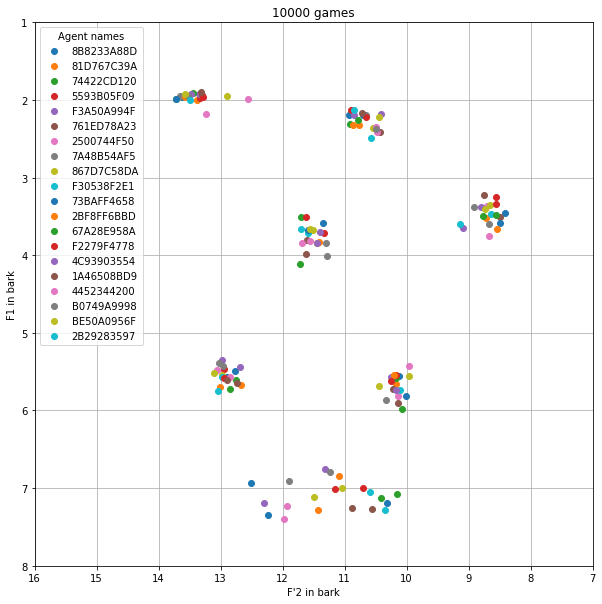

In [12]:
for game_state in game_states:
    game_state.plot();

# Delete unused variables
del game_state

#### Discussing the results

This final result is now more compactly clustered and contains more clusters.
Whilst the original results were alread in line with de Boer (2000), these newly gained results are even more in line and show the understanding and influence of some of the model parameters.

This concludes the expirement, we will now remove the results obtained.

In [13]:
# Delete unused variables
del game_states

<hr>
<hr>

## Evaluation of the emerged vowel system

De boer performed his evaluation using 1000 games for averaging and only 5000 iterations per game compared to the original 10000.
It is noted that his figure shows a double average, it averages for example the vowel size for each agent of a game, and then averages those averages to get the total average and standard deviation.
The figure thus show the average of the success ratio, sound repetoire size and energy of the agents per game.

In [14]:
if False: # Long execution disabled by default
    trials = 1000;
    results = [None] * trials;

    # Use best matching result variables to configure game
    number_of_agents = 20;
    iterations = 5000;

    agent_phoneme_step_size = 0.025; # Modified from 0.1
    agent_sound_threshold_game = 0.6; # Modified from 0.5
    agent_sound_threshold_self = 0.7;
    agent_sound_minimum_tries = 20; # Modified from 5
    agent_new_sound_probability = 0.01;

    max_noise_ambient = 0.1;

    critical_distance = 3.5;
    second_formant_weight = 0.3;

    synthesizer = Synthesizer(max_noise_ambient = max_noise_ambient);
    bark_operator = BarkOperator(critical_distance = critical_distance, second_formant_weight = second_formant_weight);

    # Perform 100 trials
    for trial in range(trials):
        # Create new game engine
        game_engine = GameEngine(number_of_agents= number_of_agents, iterations= iterations,
                                    synthesizer= synthesizer, bark_operator= bark_operator, 
                                    agent_phoneme_step_size= agent_phoneme_step_size,
                                    agent_sound_threshold_game= agent_sound_threshold_game,
                                    agent_sound_threshold_self= agent_sound_threshold_self,
                                    agent_sound_minimum_tries= agent_sound_minimum_tries,
                                    agent_new_sound_probability= agent_new_sound_probability);

        # Only save final result
        checkpoints = [iterations];

        # Save result
        results[trial] = game_engine.play_imitation_game(checkpoints)[0];

        # Print progress
        print(f"Just completed trial: {trial}", end='\r');

    # Store result to file
    with open("saved_variables/2/2-evaluation_of_emerged_vowel_system.pickle", 'wb') as f:
        pickle.dump(results, f);

    # Delete unused variables
    del number_of_agents;
    del iterations;
    del agent_phoneme_step_size;
    del agent_sound_threshold_game;
    del agent_sound_threshold_self;
    del agent_sound_minimum_tries;
    del agent_new_sound_probability;
    del max_noise_ambient;
    del critical_distance;
    del second_formant_weight;
    del synthesizer;
    del bark_operator;
    del game_engine;
    del checkpoints;
    del trial;
    del trials;
    del results;
    del f;

In [15]:
# Get saved experiment result from file
with open("saved_variables/2/2-evaluation_of_emerged_vowel_system.pickle", 'rb') as f:
    results = pickle.load(f);

# Delete unused variables
del f;

Average and standard deviation of success ratio from agents:  [0.9372751218374432, 0.018342880013747363]
Average and standard deviation of sound repetoires size from agents:  [6.327, 0.73191256308387]
Average and standard deviation of energy from agents:  [7.497724942838834, 3.3705943929352493]


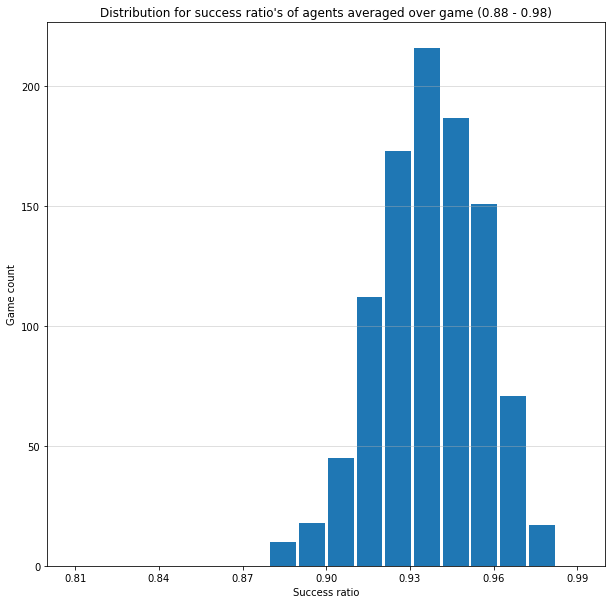

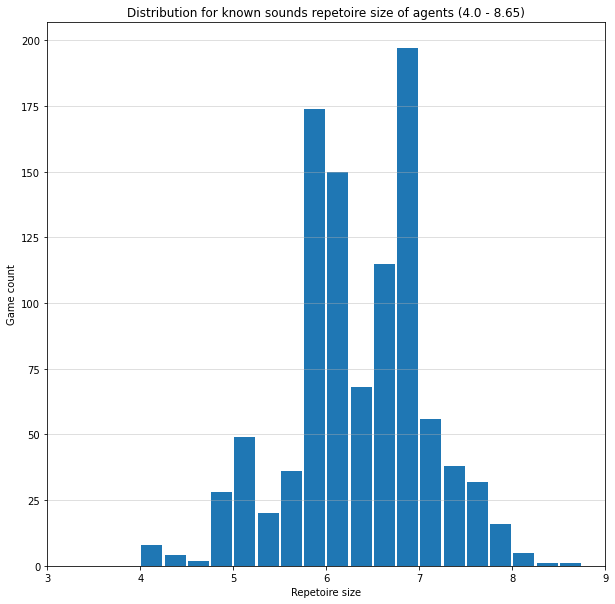

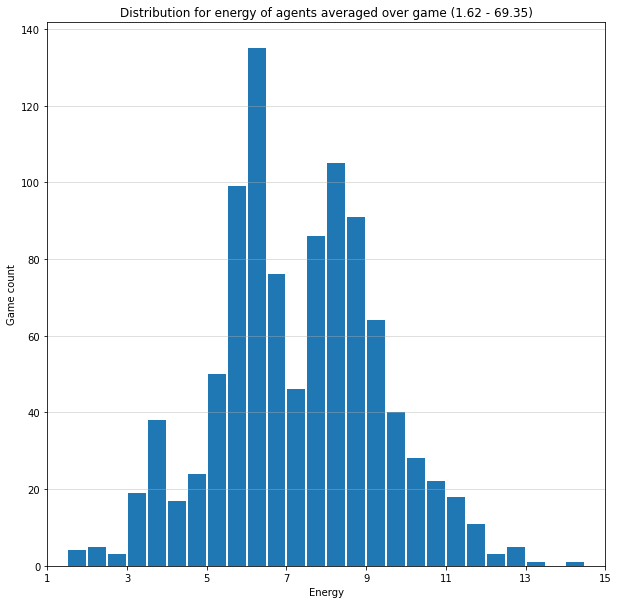

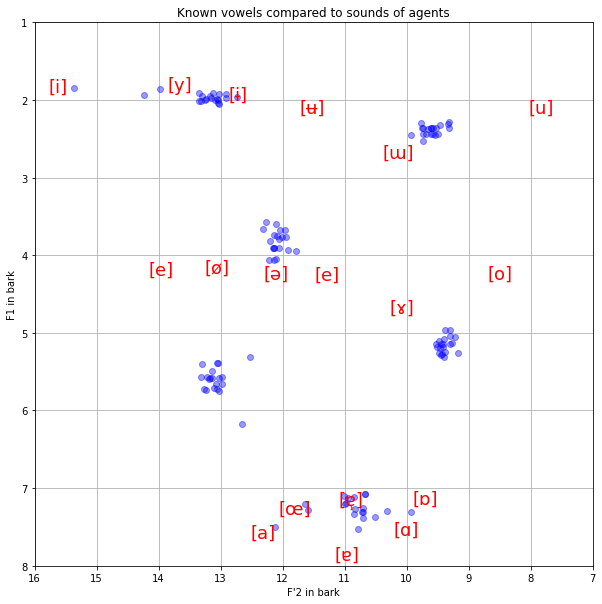

In [16]:
statistics = Statistics(bark_operator= BarkOperator());


print("Average and standard deviation of success ratio from agents: ", statistics.average_agent_success_ratio(results));
print("Average and standard deviation of sound repetoires size from agents: ", statistics.average_agent_sound_size(results));
print("Average and standard deviation of energy from agents: ", statistics.average_agent_energy(results));


statistics.plot_agent_success_ratio_distribution(results);
statistics.plot_agent_sound_size_distribution(results);
statistics.plot_agent_energy_distribution(results);

statistics.plot_known_vowels_over_sounds(results[0]);

# clear unused variables
del statistics;

<hr>
<hr>

## Sensitivity to parameter changes

TODO

<hr>

### Acoustic noise impact

TODO

<hr>

### Effective second formant weight impact

TODO

<hr>

### Population size impact

TODO